LINEAR REGRESSION 

    Y = wX + b
        Y -> dependent variable 
        X -> independent variable
        w -> weight
        b -> bias

    Gradient Descent
        Optimization algorithm used for minimizing the loss function in various machine learning algorithms.
            w = w - Ldw
            b = b - Ldb
    
    Learning Rate
        Tuning Parameter in an optimization algorithm that determines the step size of each iteration while moving towards the minimum of a loss function

In [1]:
import numpy as np

LINEAR REGRESSION

In [28]:
class Linear_Regression():

    def __init__(self, learning_rate, no_of_epochs ): # to initiate parameters
        
        self.learning_rate = learning_rate
        self.no_of_epochs = no_of_epochs
    
    def fit(self,x, y): # to fit data to the model
        
        #number of training examples and number of feautures
        # in this dataset we have only on feature -> number of years of experience

        self.m, self.n = x.shape # rows -> number of training examples, columns -> number of parameters

        self.w = np.zeros(self.n) # each parameter has its own weight
        self.b = 0 # bias has only one value for the entire model
        self.x = x
        self.y = y

        # implementing gradient descent

        for i in range(self.no_of_epochs):
            self.update_weights()

    def update_weights(self,):
        
        y_prediction = self.predict(self.x)

        # calculate the gradients

        dw = -(2 * (self.x.T).dot(self.y - y_prediction))/self.m
        db = -(2*np.sum(self.y - y_prediction))/self.m

        # updating the weights

        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db

    def predict(self,x): # input number of years of experience and predict salary
        
        return x.dot(self.w) + self.b
        

WORKFLOW OF THE REGRESSION MODEL :

    1. Set the learning rate and number of epochs, initiate weight and bias value.
    2. Build Linear Regression Equation (y = mx + b)
    3. Find the "y pred" value for rhe corresponding weight and bias
    4. Check the loss function for the parameter values
    5. Update the parameter values using Gradient Descent
    6. Repeat 3, 4, 5 till minimum loss function is reached

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [30]:
data = pd.read_csv('C:\\Users\\g7gay\\OneDrive\\Desktop\\Projects\\Linear_Regression\\salary_data.csv')

In [31]:
data.shape

(30, 2)

In [32]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [33]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values
print(x)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33, random_state =2)

In [35]:
model = Linear_Regression(learning_rate=0.02, no_of_epochs=1000)

In [36]:
model.fit(x_train, y_train)

In [38]:
# printing weights and bias

print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  9514.400999035135
bias =  23697.406507136307


PREDICTION

In [39]:
test_data_prediction = model.predict(x_test)
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


VISUALIZING

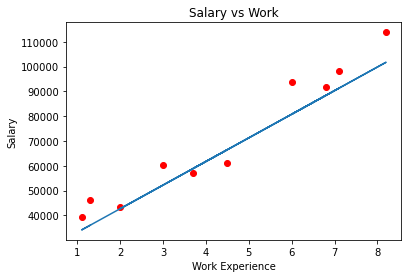

In [42]:
plt.scatter(x_test, y_test, color ='red')
plt.plot(x_test, test_data_prediction)
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Work')
plt.show()